<a name='3'></a>
### Loading the libraries and dataset

In [393]:
# Importing libraries
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pygam import GAM, ExpectileGAM, s ,l, f

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import seaborn as sns; sns.set(style="ticks", color_codes=True)

#from plotnine import *



In [367]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [368]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [369]:
# Load data
sold = pd.read_csv("Cafe+-+Sell+Meta+Data.csv")
transaction = pd.read_csv("Cafe+-+Transaction+-+Store.csv")
date_info = pd.read_csv("Cafe+-+DateInfo.csv")

In [370]:
sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SELL_ID        11 non-null     int64 
 1   SELL_CATEGORY  11 non-null     int64 
 2   ITEM_ID        11 non-null     int64 
 3   ITEM_NAME      11 non-null     object
dtypes: int64(3), object(1)
memory usage: 480.0+ bytes


In [371]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CALENDAR_DATE  5404 non-null   object 
 1   PRICE          5404 non-null   float64
 2   QUANTITY       5404 non-null   int64  
 3   SELL_ID        5404 non-null   int64  
 4   SELL_CATEGORY  5404 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 211.2+ KB


In [372]:
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CALENDAR_DATE        1349 non-null   object 
 1   YEAR                 1349 non-null   int64  
 2   HOLIDAY              105 non-null    object 
 3   IS_WEEKEND           1349 non-null   int64  
 4   IS_SCHOOLBREAK       1349 non-null   int64  
 5   AVERAGE_TEMPERATURE  1349 non-null   float64
 6   IS_OUTDOOR           1349 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 73.9+ KB


In [373]:
transaction['CALENDAR_DATE'] = pd.to_datetime(transaction['CALENDAR_DATE'])
date_info['CALENDAR_DATE'] = pd.to_datetime(date_info['CALENDAR_DATE'])

In [374]:
transaction['CALENDAR_DATE'].min(),transaction['CALENDAR_DATE'].max()

(Timestamp('2012-01-01 00:00:00'), Timestamp('2015-09-10 00:00:00'))

In [375]:
date_info['CALENDAR_DATE'].min(),date_info['CALENDAR_DATE'].max()

(Timestamp('2012-01-01 00:00:00'), Timestamp('2015-09-10 00:00:00'))

In [376]:
date_info.shape, transaction.shape, sold.shape

((1349, 7), (5404, 5), (11, 4))

In [377]:
intrm_tbl = pd.merge(date_info, transaction, on = 'CALENDAR_DATE')
intrm_tbl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5420 entries, 0 to 5419
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CALENDAR_DATE        5420 non-null   datetime64[ns]
 1   YEAR                 5420 non-null   int64         
 2   HOLIDAY              420 non-null    object        
 3   IS_WEEKEND           5420 non-null   int64         
 4   IS_SCHOOLBREAK       5420 non-null   int64         
 5   AVERAGE_TEMPERATURE  5420 non-null   float64       
 6   IS_OUTDOOR           5420 non-null   int64         
 7   PRICE                5420 non-null   float64       
 8   QUANTITY             5420 non-null   int64         
 9   SELL_ID              5420 non-null   int64         
 10  SELL_CATEGORY        5420 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 508.1+ KB


In [378]:
final_table = pd.merge(intrm_tbl, sold, on='SELL_ID', suffixes=('_intrm', '_sold'))
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CALENDAR_DATE        10840 non-null  datetime64[ns]
 1   YEAR                 10840 non-null  int64         
 2   HOLIDAY              840 non-null    object        
 3   IS_WEEKEND           10840 non-null  int64         
 4   IS_SCHOOLBREAK       10840 non-null  int64         
 5   AVERAGE_TEMPERATURE  10840 non-null  float64       
 6   IS_OUTDOOR           10840 non-null  int64         
 7   PRICE                10840 non-null  float64       
 8   QUANTITY             10840 non-null  int64         
 9   SELL_ID              10840 non-null  int64         
 10  SELL_CATEGORY_intrm  10840 non-null  int64         
 11  SELL_CATEGORY_sold   10840 non-null  int64         
 12  ITEM_ID              10840 non-null  int64         
 13  ITEM_NAME            10840 non-

In [379]:
final_table = final_table.sort_values(by = 'CALENDAR_DATE').reset_index(drop = True)
final_table.drop(columns=['SELL_CATEGORY_intrm'], inplace= True)

In [380]:
final_table.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY_sold,ITEM_ID,ITEM_NAME
0,2012-01-01,2012,New Year,1,0,24.8,0,15.50,46,1070,0,7821,BURGER
1,2012-01-01,2012,New Year,1,0,24.8,0,12.75,18,2052,2,6249,LEMONADE
2,2012-01-01,2012,New Year,1,0,24.8,0,12.75,18,2052,2,7821,BURGER
3,2012-01-01,2012,New Year,1,0,24.8,0,12.73,22,2051,2,7821,BURGER
4,2012-01-01,2012,New Year,1,0,24.8,0,12.73,22,2051,2,5030,COKE


In [381]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CALENDAR_DATE        10840 non-null  datetime64[ns]
 1   YEAR                 10840 non-null  int64         
 2   HOLIDAY              840 non-null    object        
 3   IS_WEEKEND           10840 non-null  int64         
 4   IS_SCHOOLBREAK       10840 non-null  int64         
 5   AVERAGE_TEMPERATURE  10840 non-null  float64       
 6   IS_OUTDOOR           10840 non-null  int64         
 7   PRICE                10840 non-null  float64       
 8   QUANTITY             10840 non-null  int64         
 9   SELL_ID              10840 non-null  int64         
 10  SELL_CATEGORY_sold   10840 non-null  int64         
 11  ITEM_ID              10840 non-null  int64         
 12  ITEM_NAME            10840 non-null  object        
dtypes: datetime64[ns](1), float64(2

In [382]:
final_table.isnull().sum()

CALENDAR_DATE              0
YEAR                       0
HOLIDAY                10000
IS_WEEKEND                 0
IS_SCHOOLBREAK             0
AVERAGE_TEMPERATURE        0
IS_OUTDOOR                 0
PRICE                      0
QUANTITY                   0
SELL_ID                    0
SELL_CATEGORY_sold         0
ITEM_ID                    0
ITEM_NAME                  0
dtype: int64

# Data Pre-processing

In [383]:
# filling missing values

final_table['HOLIDAY'] = final_table['HOLIDAY'].fillna('Non Holiday')

In [384]:
final_table['is_event'] = np.where(final_table['HOLIDAY'] != 'Non Holiday', 1,0)

In [385]:
final_table['Revenue'] = final_table['PRICE'] * final_table['QUANTITY']

In [386]:
gam_table = final_table.copy()

# Exploratory data analysis

In [340]:
final_table.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY_sold,ITEM_ID,ITEM_NAME,is_event,Revenue
0,2012-01-01,2012,New Year,1,0,24.8,0,15.50,46,1070,0,7821,BURGER,1,713.00
1,2012-01-01,2012,New Year,1,0,24.8,0,12.75,18,2052,2,6249,LEMONADE,1,229.50
2,2012-01-01,2012,New Year,1,0,24.8,0,12.75,18,2052,2,7821,BURGER,1,229.50
3,2012-01-01,2012,New Year,1,0,24.8,0,12.73,22,2051,2,7821,BURGER,1,280.06
4,2012-01-01,2012,New Year,1,0,24.8,0,12.73,22,2051,2,5030,COKE,1,280.06


In [341]:
avg_price_per_year = final_table.groupby(['YEAR'])['PRICE'].mean().reset_index()

avg_price_per_year

,YEAR,PRICE
0,2012,12.442997
1,2013,12.528548
2,2014,12.620161
3,2015,12.202125


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='YEAR', ylabel='PRICE'>

Text(0.5, 1.0, 'Average Item Price Variation Over the Years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average price')

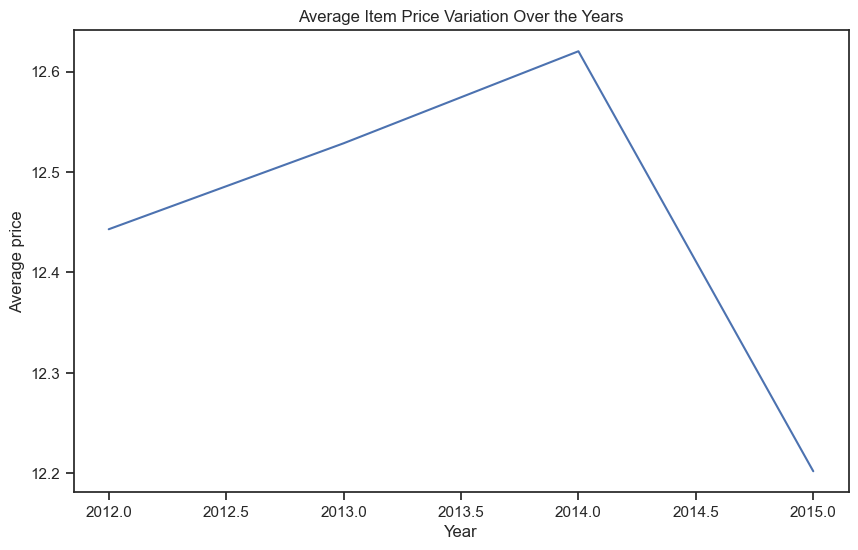

In [342]:
plt.figure(figsize= (10,6))
sns.lineplot(x = 'YEAR', y = 'PRICE', data = avg_price_per_year)
plt.title('Average Item Price Variation Over the Years')
plt.xlabel('Year')
plt.ylabel('Average price')
plt.show()

In [343]:
avg_price_per_year_byitem = final_table.groupby(['YEAR', 'ITEM_NAME'])['PRICE'].mean().reset_index()


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='YEAR', ylabel='PRICE'>

Text(0.5, 1.0, 'Average Item Price Variation Over the Years Across Items')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average price')

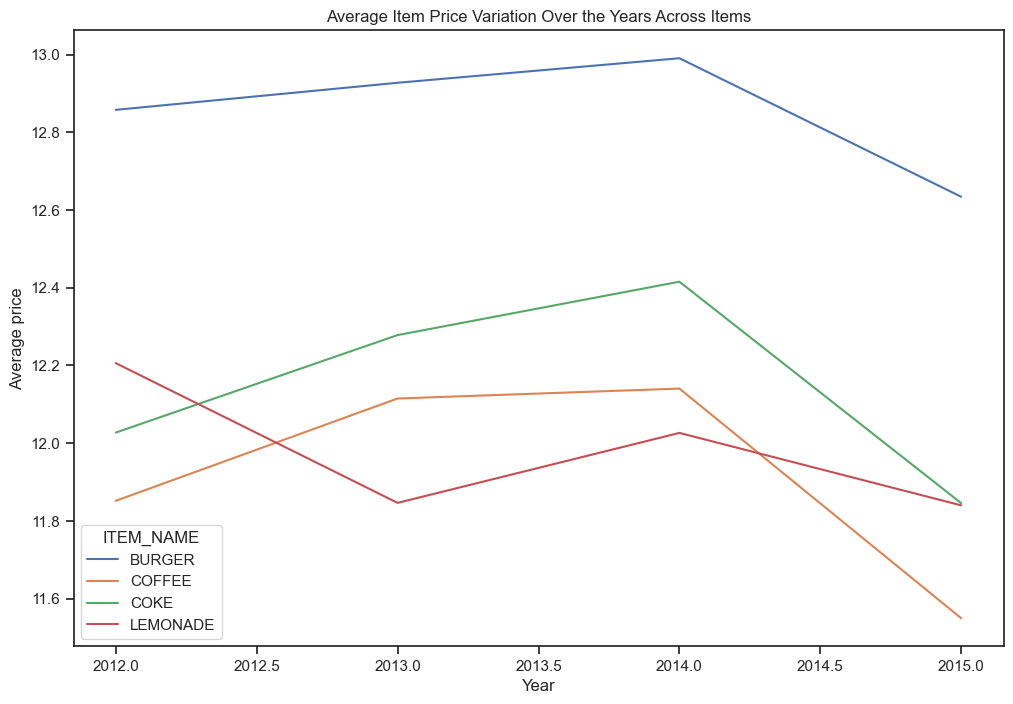

In [344]:
plt.figure(figsize= (12,8))
sns.lineplot(x = 'YEAR', y = 'PRICE', hue = 'ITEM_NAME', data = avg_price_per_year_byitem)
plt.title('Average Item Price Variation Over the Years Across Items')
plt.xlabel('Year')
plt.ylabel('Average price')
plt.show()

In [345]:
holiday_price_df = final_table.groupby(['is_event', 'PRICE'])['QUANTITY'].mean().reset_index()


holiday_price_df['Round_Price'] = np.round(holiday_price_df['PRICE'],0)
holiday_price_df = holiday_price_df.groupby(['is_event', 'Round_Price'])['QUANTITY'].mean().reset_index()

<Figure size 2000x800 with 0 Axes>

<Axes: xlabel='Round_Price', ylabel='QUANTITY'>

Text(0.5, 1.0, 'Average Quantity sold during holidays')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Average Quantity sold')

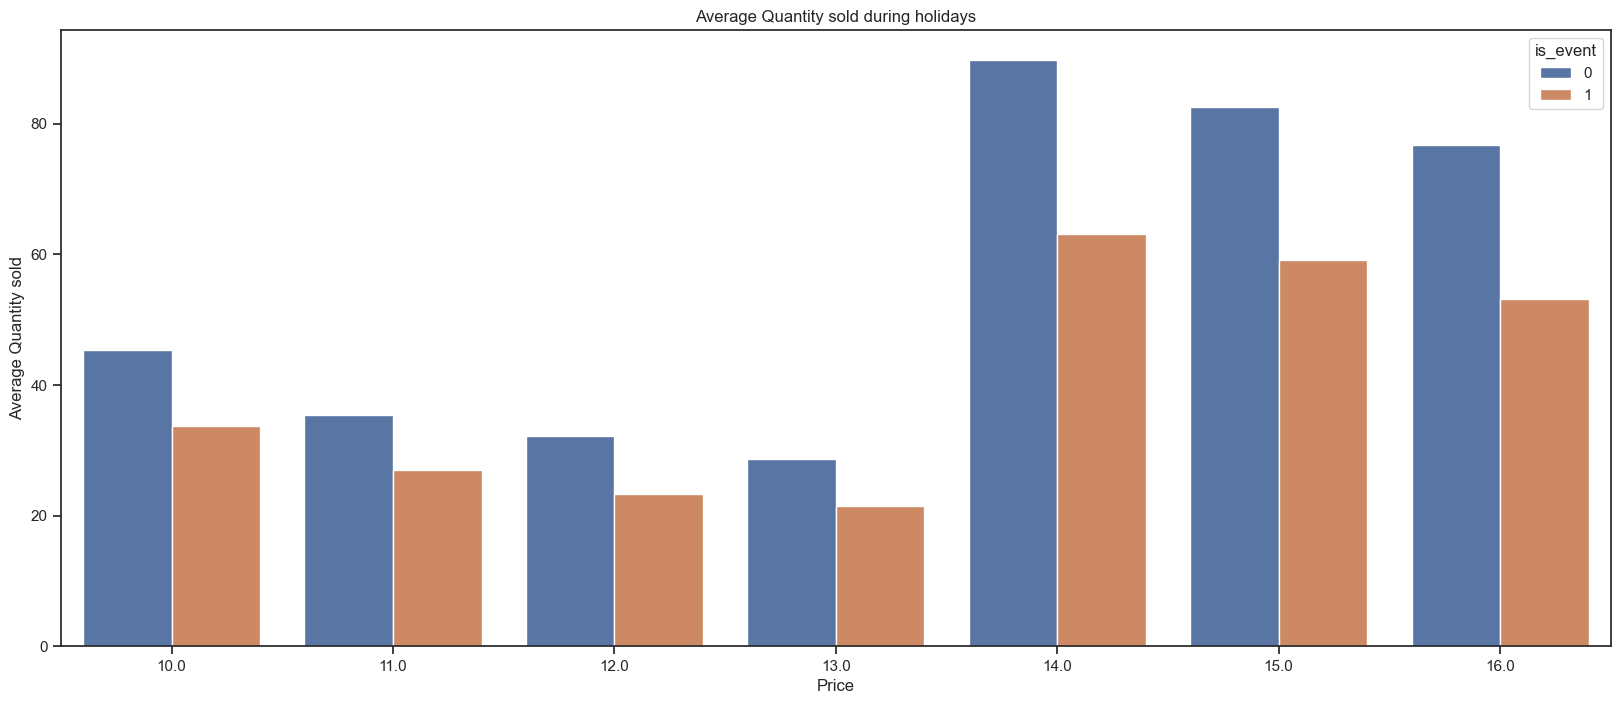

In [346]:
plt.figure(figsize= (20,8))
sns.barplot(x = 'Round_Price', y = 'QUANTITY', hue = 'is_event', data = holiday_price_df)
plt.title('Average Quantity sold during holidays')
plt.xlabel('Price')
plt.ylabel('Average Quantity sold')
plt.show()

In [347]:
final_table.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY_sold,ITEM_ID,ITEM_NAME,is_event,Revenue
0,2012-01-01,2012,New Year,1,0,24.8,0,15.50,46,1070,0,7821,BURGER,1,713.00
1,2012-01-01,2012,New Year,1,0,24.8,0,12.75,18,2052,2,6249,LEMONADE,1,229.50
2,2012-01-01,2012,New Year,1,0,24.8,0,12.75,18,2052,2,7821,BURGER,1,229.50
3,2012-01-01,2012,New Year,1,0,24.8,0,12.73,22,2051,2,7821,BURGER,1,280.06
4,2012-01-01,2012,New Year,1,0,24.8,0,12.73,22,2051,2,5030,COKE,1,280.06


In [348]:
weekend_price_df = final_table.groupby(['IS_WEEKEND'])['PRICE','QUANTITY'].mean().reset_index()

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='IS_WEEKEND', ylabel='QUANTITY'>

Text(0.5, 1.0, 'Average Quantity sold during holidays')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Average Quantity sold')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


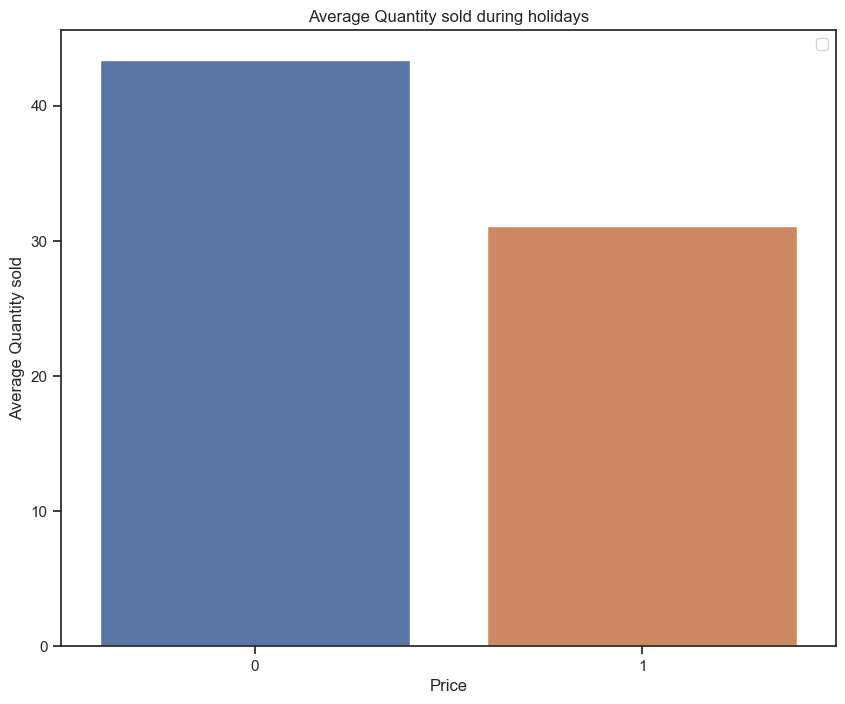

In [349]:
plt.figure(figsize= (10,8))
sns.barplot(x = 'IS_WEEKEND', y = 'QUANTITY', data = weekend_price_df)
plt.title('Average Quantity sold during holidays')
plt.xlabel('Price')
plt.ylabel('Average Quantity sold')
plt.legend()
plt.show()

In [350]:
weekend_price_df = final_table.groupby(['IS_WEEKEND','ITEM_NAME'])['PRICE','QUANTITY'].mean().reset_index()

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='IS_WEEKEND', ylabel='QUANTITY'>

Text(0.5, 1.0, 'Average Quantity sold during holidays')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Average Quantity sold')

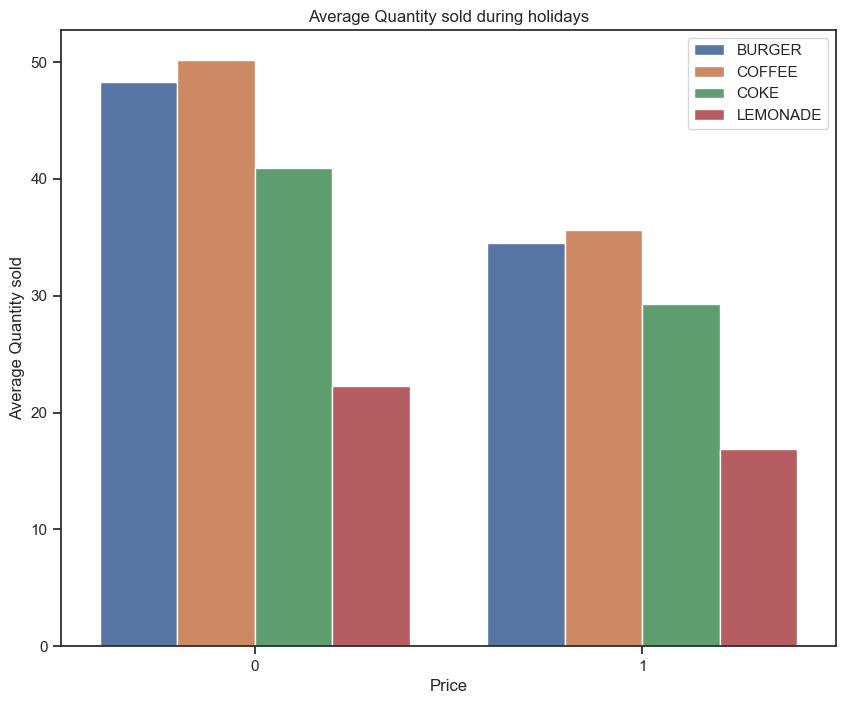

In [351]:
plt.figure(figsize= (10,8))
sns.barplot(x = 'IS_WEEKEND', y = 'QUANTITY', hue = 'ITEM_NAME', data = weekend_price_df)
plt.title('Average Quantity sold during holidays')
plt.xlabel('Price')
plt.ylabel('Average Quantity sold')
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='IS_WEEKEND', ylabel='PRICE'>

Text(0.5, 1.0, 'Average Quantity sold during holidays')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Average Quantity sold')

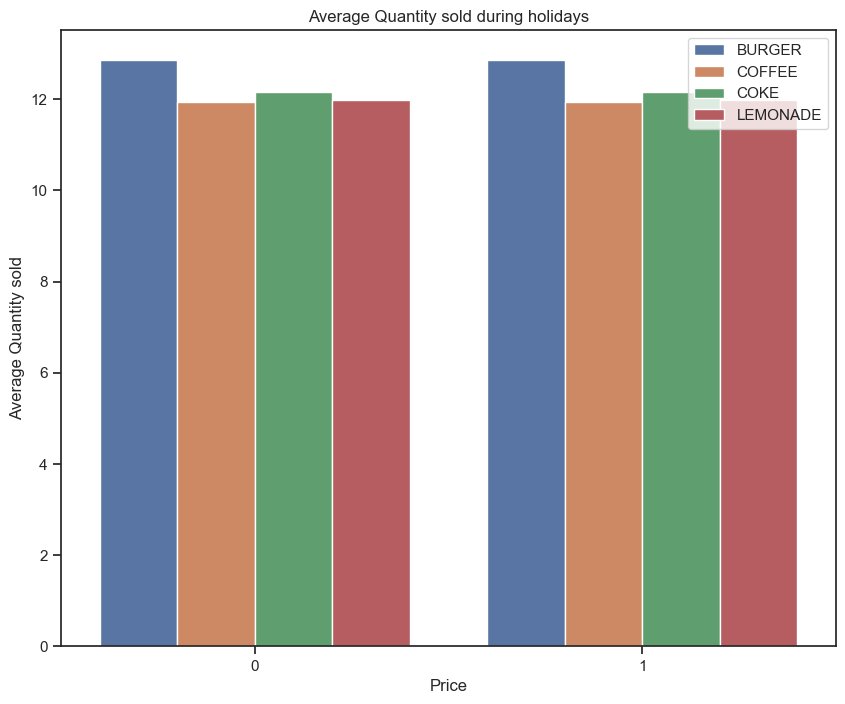

In [352]:
plt.figure(figsize= (10,8))
sns.barplot(x = 'IS_WEEKEND', y = 'PRICE', hue = 'ITEM_NAME', data = weekend_price_df)
plt.title('Average Quantity sold during holidays')
plt.xlabel('Price')
plt.ylabel('Average Quantity sold')
plt.legend()
plt.show()

In [353]:
weekend_price_df = final_table.groupby(['IS_SCHOOLBREAK'])['PRICE','QUANTITY'].mean().reset_index()

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='IS_SCHOOLBREAK', ylabel='QUANTITY'>

Text(0.5, 1.0, 'Average Quantity sold during holidays')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Average Quantity sold')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


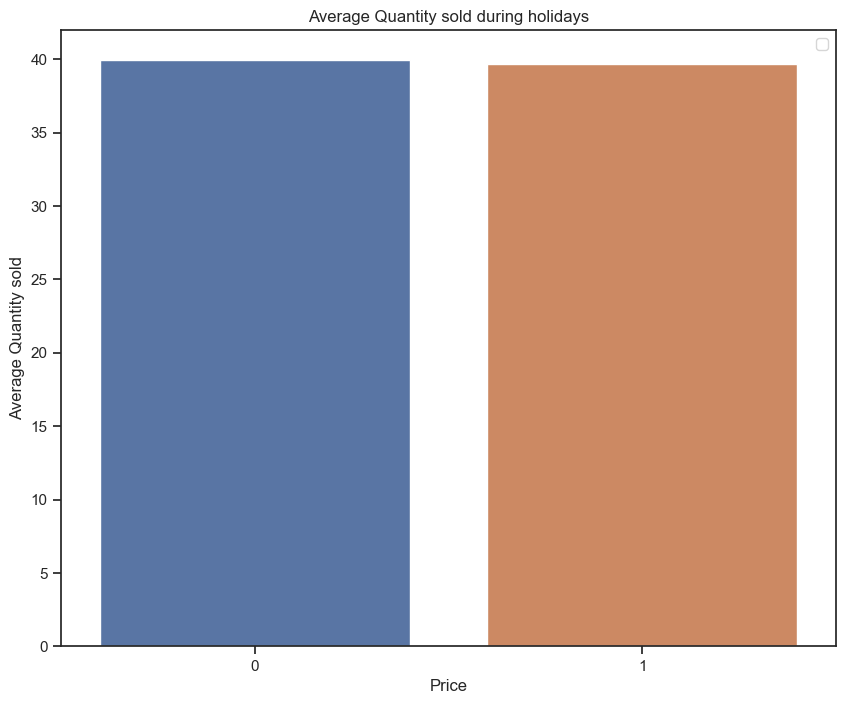

In [354]:
plt.figure(figsize= (10,8))
sns.barplot(x = 'IS_SCHOOLBREAK', y = 'QUANTITY', data = weekend_price_df)
plt.title('Average Quantity sold during holidays')
plt.xlabel('Price')
plt.ylabel('Average Quantity sold')
plt.legend()
plt.show()

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

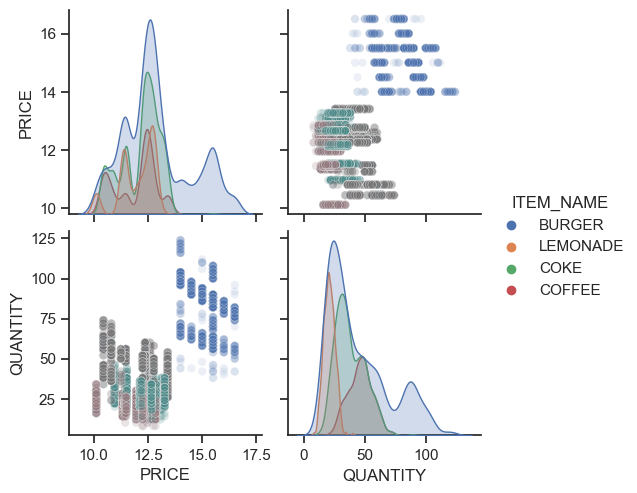

In [355]:
# pairplot for combined data 
plt.figure(figsize=(20,8))
sns.pairplot(final_table[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

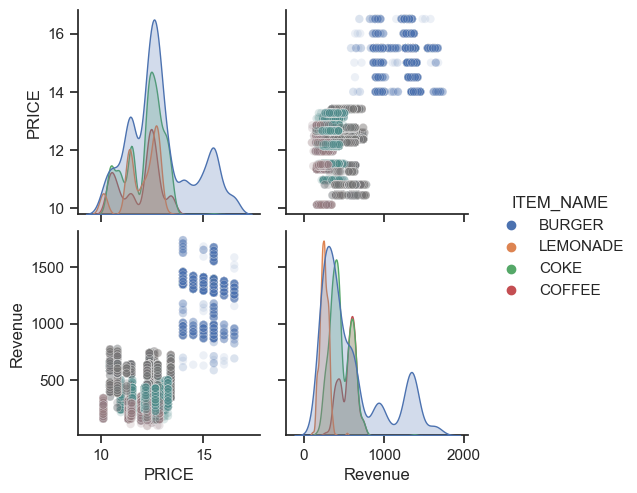

In [356]:
# pairplot for combined data 
plt.figure(figsize=(20,8))
sns.pairplot(final_table[['PRICE','Revenue','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

In [357]:
final_table.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY_sold,ITEM_ID,ITEM_NAME,is_event,Revenue
0,2012-01-01,2012,New Year,1,0,24.8,0,15.50,46,1070,0,7821,BURGER,1,713.00
1,2012-01-01,2012,New Year,1,0,24.8,0,12.75,18,2052,2,6249,LEMONADE,1,229.50
2,2012-01-01,2012,New Year,1,0,24.8,0,12.75,18,2052,2,7821,BURGER,1,229.50
3,2012-01-01,2012,New Year,1,0,24.8,0,12.73,22,2051,2,7821,BURGER,1,280.06
4,2012-01-01,2012,New Year,1,0,24.8,0,12.73,22,2051,2,5030,COKE,1,280.06


In [358]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding the 'item' column
encoder_item = OneHotEncoder(sparse=False)

item_encoded = encoder_item.fit_transform(final_table[['ITEM_NAME']])

#Creating a DataFrame for the encoded 'item' data
df_encoded = pd.DataFrame(item_encoded, columns = encoder_item.get_feature_names_out(['ITEM_NAME']))

# Concatenating the encoded 'item' data with the original data
final_table = pd.concat([final_table, df_encoded], axis=1)

# One-hot encoding the 'holiday' column as well
encoder_holiday = OneHotEncoder(sparse=False, drop='first') # Define a new encoder for the holiday column

holiday_encoded = encoder_holiday.fit_transform(final_table[['HOLIDAY']])
encoded_holiday_df = pd.DataFrame (holiday_encoded, columns=encoder_holiday.get_feature_names_out(['HOLIDAY']))

# Concatenating the encoded 'holiday' data with the original data
final_table = pd.concat([final_table, encoded_holiday_df], axis=1)


#Displaying the first few rows of the modified dataset
final_table.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY_sold,ITEM_ID,ITEM_NAME,is_event,Revenue,ITEM_NAME_BURGER,ITEM_NAME_COFFEE,ITEM_NAME_COKE,ITEM_NAME_LEMONADE,HOLIDAY_Labor Day,HOLIDAY_Luner New Year,HOLIDAY_Mid-Autumn Day,HOLIDAY_National Day,HOLIDAY_New Year,HOLIDAY_Non Holiday,HOLIDAY_Qing Ming Festival,HOLIDAY_WWII Celebration
0,2012-01-01,2012,New Year,1,0,24.8,0,15.50,46,1070,0,7821,BURGER,1,713.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2012-01-01,2012,New Year,1,0,24.8,0,12.75,18,2052,2,6249,LEMONADE,1,229.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2012-01-01,2012,New Year,1,0,24.8,0,12.75,18,2052,2,7821,BURGER,1,229.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2012-01-01,2012,New Year,1,0,24.8,0,12.73,22,2051,2,7821,BURGER,1,280.06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2012-01-01,2012,New Year,1,0,24.8,0,12.73,22,2051,2,5030,COKE,1,280.06,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [359]:
final_table.drop(columns= ['ITEM_NAME','ITEM_ID','HOLIDAY','CALENDAR_DATE','YEAR' , 'SELL_ID'], inplace = True)

### Model Building

In [360]:
y = final_table['QUANTITY']
X = final_table.drop('QUANTITY', axis = 1)

In [361]:
X = sm.add_constant(X)
X['is_event'] = pd.to_numeric(X['is_event'])

model = sm.OLS(y , X).fit()

In [362]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               QUANTITY   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 9.831e+04
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:00:21   Log-Likelihood:                -20692.
No. Observations:               10840   AIC:                         4.142e+04
Df Residuals:                   10821   BIC:                         4.156e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         22.0915      0.214    103.086      0.000      21.671      22.512
IS_WEEKEND                    -0.0203      0.041     -0.496      0.620      -0.100       0.060
IS_SCHOOLBREAK                -0.0913      0.043     -2.117      0.034      -0.176      -0.007
AVERAGE_TEMPERATURE           -0.0017      0.001     -1.628      0.104      -0.004       0.000
IS_OUTDOOR                    -0.0095      0.058     -0.163      0.871      -0.124       0.105
PRICE                         -3.4875      0.019   -186.232      0.000      -3.524      -3.451
SELL_CATEGORY_sold             2.9088      0.071     40.746      0.000       2.769       3.049
is_event                      11.0144      0.148     74.615      0.000      10.725      11.304
Revenue                        0.0779      0.000    581.356      0.000       0.078       0.078
ITEM_NAME_BURGER               5.4052      0.057     94.554      0.000       5.293       5.517
ITEM_NAME_COFFEE               6.3646      0.075     85.241      0.000       6.218       6.511
ITEM_NAME_COKE                 5.8938      0.066     89.478      0.000       5.765       6.023
ITEM_NAME_LEMONADE             4.4279      0.058     76.544      0.000       4.315       4.541
HOLIDAY_Labor Day              0.0977      0.236      0.414      0.679      -0.365       0.561
HOLIDAY_Luner New Year         0.2915      0.207      1.406      0.160      -0.115       0.698
HOLIDAY_Mid-Autumn Day         0.3990      0.275      1.452      0.147      -0.140       0.938
HOLIDAY_National Day          -0.0997      0.209     -0.476      0.634      -0.510       0.311
HOLIDAY_New Year               0.3110      0.251      1.238      0.216      -0.182       0.803
HOLIDAY_Non Holiday           11.0771      0.125     88.600      0.000      10.832      11.322
HOLIDAY_Qing Ming Festival     0.2794      0.237      1.179      0.238      -0.185       0.744
HOLIDAY_WWII Celebration      -0.4444      0.373     -1.192      0.233      -1.175       0.287
==============================================================================
Omnibus:                      757.510   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3823.807
Skew:                          -0.085   Prob(JB):                         0.00
Kurtosis:                       5.905   Cond. No.                     6.97e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.12e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#  Expectile Generalized Additive Models (GAM)

In [388]:
gam_table.HOLIDAY.value_counts()

Non Holiday             10000
Luner New Year            224
National Day              168
Qing Ming Festival         96
Labor Day                  96
Dragon Boat Festivel       96
New Year                   80
Mid-Autumn Day             56
WWII Celebration           24
Name: HOLIDAY, dtype: int64

In [392]:
gam_table.head(20)

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY_sold,ITEM_ID,ITEM_NAME,is_event,Revenue
0,2012-01-01,2012,New Year,1,0,24.8,0,15.50,46,1070,0,7821,BURGER,1,713.00
1,2012-01-01,2012,New Year,1,0,24.8,0,12.75,18,2052,2,6249,LEMONADE,1,229.50
2,2012-01-01,2012,New Year,1,0,24.8,0,12.75,18,2052,2,7821,BURGER,1,229.50
3,2012-01-01,2012,New Year,1,0,24.8,0,12.73,22,2051,2,7821,BURGER,1,280.06
4,2012-01-01,2012,New Year,1,0,24.8,0,12.73,22,2051,2,5030,COKE,1,280.06
5,2012-01-01,2012,New Year,1,0,24.8,0,12.60,30,2053,2,5030,COKE,1,378.00
6,2012-01-01,2012,New Year,1,0,24.8,0,12.60,30,2053,2,3052,COFFEE,1,378.00
7,2012-01-01,2012,New Year,1,0,24.8,0,12.60,30,2053,2,7821,BURGER,1,378.00
8,2012-01-02,2012,New Year,0,0,24.8,0,12.60,34,2053,2,3052,COFFEE,1,428.40
9,2012-01-02,2012,New Year,0,0,24.8,0,15.50,70,1070,0,7821,BURGER,1,1085.00


In [389]:
gam_table.sample(10)

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY_sold,ITEM_ID,ITEM_NAME,is_event,Revenue
8780,2014-12-27,2014,Non Holiday,1,0,28.4,0,10.81,44,2053,2,7821,BURGER,0,475.64
9706,2015-04-22,2015,Non Holiday,0,0,68.0,1,12.26,22,2052,2,7821,BURGER,0,269.72
183,2012-01-23,2012,Non Holiday,0,0,23.0,0,12.60,52,2053,2,7821,BURGER,0,655.20
1472,2012-07-04,2012,Non Holiday,0,0,84.2,1,15.00,92,1070,0,7821,BURGER,0,1380.00
5957,2014-01-08,2014,Non Holiday,0,0,21.2,0,12.37,60,2053,2,7821,BURGER,0,742.20
3346,2013-02-23,2013,Non Holiday,1,0,33.8,1,13.13,18,2051,2,5030,COKE,0,236.34
4543,2013-07-15,2013,Non Holiday,0,1,80.6,1,16.50,82,1070,0,7821,BURGER,0,1353.00
4935,2013-09-02,2013,Non Holiday,0,0,69.8,1,14.00,104,1070,0,7821,BURGER,0,1456.00
7699,2014-08-14,2014,Non Holiday,0,1,84.2,1,12.14,34,2051,2,7821,BURGER,0,412.76
534,2012-03-08,2012,Non Holiday,0,0,39.2,1,12.60,42,2053,2,7821,BURGER,0,529.20


In [397]:
filtered_data = gam_table.query('HOLIDAY == "Non Holiday"')
unique_products = filtered_data['ITEM_NAME'].unique()
all_results = pd.DataFrame()

for product in unique_products:
    product_data = filtered_data[filtered_data['ITEM_NAME'] == product]
    X_values = product_data['PRICE']
    y_values = product_data['QUANTITY']
    quantiles = [0.025, 0.5, 0.975]
    results_dict = {}

In [403]:
quantiles = [0.25, 0.5, 0.75]  # Example list of quantiles
results_dict = {}

# Loop through quantiles and fit models
for q in quantiles:
    model = ExpectileGAM(s(0), expectile=q)  # Corrected the initialization
    model.fit(X_values, y_values)  # Assuming X_values and y_values are defined
    
    # Predict quantity
    results_dict[f"pred_{q}"] = model.predict(X_values)
    
    # Predict revenue
    results_dict[f"revenue_pred_{q}"] = model.predict(X_values) * product_data['PRICE']  # Assuming product_data is defined

# Create DataFrame of predicted values
predicted_values_df = pd.DataFrame(results_dict, index=X_values.index)

# Combine predicted values with other data
combined_df = pd.concat([product_data[['PRICE', 'ITEM_NAME', 'QUANTITY']], predicted_values_df], axis=1)

# Concatenate with all_results (assuming all_results is defined)
all_results = pd.concat([all_results, combined_df], axis=0)

ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.25, 
   fit_intercept=True, max_iter=100, scale=None, 
   terms=s(0) + intercept, tol=0.0001, verbose=False)

ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
   fit_intercept=True, max_iter=100, scale=None, 
   terms=s(0) + intercept, tol=0.0001, verbose=False)

ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.75, 
   fit_intercept=True, max_iter=100, scale=None, 
   terms=s(0) + intercept, tol=0.0001, verbose=False)

In [405]:
!pip install plotnine

  Using cached plotnine-0.13.4-py3-none-any.whl (1.3 MB)
  Using cached statsmodels-0.14.1-cp310-cp310-macosx_11_0_arm64.whl (10.1 MB)
  Using cached pandas-2.2.2.tar.gz (4.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mizani-0.11.1-py3-none-any.whl (127 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for pandas: filename=pandas-2.2.2-cp310-cp310-macosx_14_0_arm64.whl size=40179803 sha256=0373ccd7d0c56989f1dc5dbb802739d7de67f8129d74f0cd2fa3128efef0796c
  Stored in directory: /Users/anubhavnehru/Library/Caches/pip/wheels/ac/76/b9/2aaf513052b0a854f45061319fbbeec9c780eefed81aea5131
Successfully built pandas
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.3
    Uninstalling patsy-0.5.3:
      Successfully uninstalled patsy-0.5.3
  Attempt

In [414]:
all_results.head()

,PRICE,ITEM_NAME,QUANTITY,pred_0.25,revenue_pred_0.25,pred_0.5,revenue_pred_0.5,pred_0.75,revenue_pred_0.75
31,12.6,COFFEE,42,39.503569,497.744967,43.280545,545.334866,46.442853,585.179954
35,12.6,COFFEE,58,39.503569,497.744967,43.280545,545.334866,46.442853,585.179954
42,12.6,COFFEE,54,39.503569,497.744967,43.280545,545.334866,46.442853,585.179954
55,12.6,COFFEE,42,39.503569,497.744967,43.280545,545.334866,46.442853,585.179954
57,12.6,COFFEE,42,39.503569,497.744967,43.280545,545.334866,46.442853,585.179954


In [415]:
from plotnine import ggplot, aes, geom_point, geom_line, geom_ribbon, facet_wrap, theme, labs

#Create the ggplot
plot = (ggplot(all_results, aes(x='Price', y='QUANTITY', color='ITEM_NAME'))
        + geom_point(alpha=0.5)  # Plot the original data points
        + geom_line(aes(y='pred_0.5'), color='blue', size=1.5)  # Darker line for median prediction
        + geom_ribbon(aes(ymin='pred_0.025', ymax='pred_0.975'), fill='#d3d3d3', color='#FF000000', alpha=0.75,
        show_legend=False)  # Grey ribbon for the 2.5th and 97.5th percentiles
        + facet_wrap('item', scales='free')  # Separate plots for each product
        + labs(title='Expedtile GAM Analysis', x='Price', y='QUANTITY')  # Add Labels and title
        + theme(figure_size=(12, 8))  # Increase the size of the plot (width, height) in inches
)



In [416]:
plot

PlotnineError: 'At least one layer must contain all variables used for facetting'

PlotnineError: 'At least one layer must contain all variables used for facetting'

In [417]:
best_025 = all_results.groupby('ITEM_NAME').apply(lambda x: x.nlargest(1, 'revenue_pred_0.025')).reset_index(level=0, drop=True)
best_050 = all_results.groupby('ITEM_NAME').apply(lambda x: x.nlargest(1, 'revenue_pred_0.5')).reset_index(level=0, drop=True)
best_0975 = all_results.groupby('ITEM_NAME').apply(lambda x: x.nlargest(1, 'revenue_pred_0.975')).reset_index(level=0, drop=True)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    """
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'revenue_pred_0.025'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/f3/hq7n6w7d59n_lkymzcwnbnhc0000gn/T/ipykernel_10714/3346031720.py", line 1, in <module>
    best_025 = 

In [ ]:
# Define a more visually appealing color palette
color_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#9b59b6', '#34495e', '#1abc9c', '#d35400', '#7f8c8d']

plot(ggplot(all_results, aes (x='price', y='revenue_pred_0.5', color='item', group='item'))                                                                                                         + geom_ribbon (aes (ymin='revenue_pred_0.025', ymax='revenue_pred_0.975'), fill='#d3d3d3', alpha=0.75,

        + geom_point(aes (y='revenue'), alpha=0.15, color='#2C3E50') # Original data points               

        + geom_line(aes (y='revenue_pred_0.5'), alpha=0.5)
        + geom_point(aes (y= 'revenue_pred_0.5'), data=best_050, color='red') # Best 0.5 revenue points
                                                                               # Best 0.975 revenue points                                                                         geom_point(aes (y= 'revenue_pred_0.975'), data=best_0975, color='blue')
        + geom_point(aes (y= 'revenue_pred_0.025'), data=best_025, color='green') # Best 0.025 revenue points

        + facet_wrap('item', scales 'free') # Separate plots for each product
        + labs (title='Items Price Optimization', x='Price', y='Revenue') # Add Labels and title
        + theme(figure_size=(12, 8)) # Increase the size of the plot

)                                                             + scale_color_manual(values=color_palette)

#Display the plot
print(plot)
